In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**LSTM deployed on the stock market data(SP500).**

##**1. Import libraries.**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

## **2. normalizing the dataset and do train and test split.**

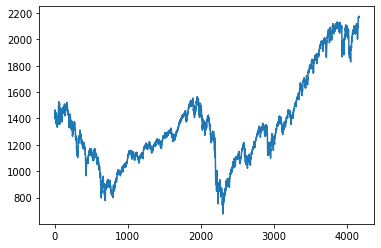

2791 1376


In [ ]:
dataset = pandas.read_csv('/content/drive/MyDrive/RNN-LSTM/sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [ ]:
print(dataset)

[[0.48240909]
 [0.48420417]
 [0.48509838]
 ...
 [0.99562893]
 [0.99609603]
 [0.99436106]]


## **3. Converting an array of values into a timeseries data.**

In [ ]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX.shape

(2789, 1)

## **4. Reshaping the input to be [samples, time steps, features].**

In [ ]:

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## **5. Create and fit the LSTM network.**

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
279/279 - 2s - loss: 0.0262 - 2s/epoch - 9ms/step
Epoch 2/100
279/279 - 1s - loss: 0.0056 - 863ms/epoch - 3ms/step
Epoch 3/100
279/279 - 1s - loss: 0.0030 - 875ms/epoch - 3ms/step
Epoch 4/100
279/279 - 1s - loss: 9.0028e-04 - 900ms/epoch - 3ms/step
Epoch 5/100
279/279 - 1s - loss: 1.7473e-04 - 843ms/epoch - 3ms/step
Epoch 6/100
279/279 - 1s - loss: 1.0329e-04 - 862ms/epoch - 3ms/step
Epoch 7/100
279/279 - 1s - loss: 1.0154e-04 - 869ms/epoch - 3ms/step
Epoch 8/100
279/279 - 1s - loss: 1.0190e-04 - 883ms/epoch - 3ms/step
Epoch 9/100
279/279 - 1s - loss: 1.0157e-04 - 871ms/epoch - 3ms/step
Epoch 10/100
279/279 - 1s - loss: 1.0113e-04 - 900ms/epoch - 3ms/step
Epoch 11/100
279/279 - 1s - loss: 1.0176e-04 - 894ms/epoch - 3ms/step
Epoch 12/100
279/279 - 1s - loss: 1.0268e-04 - 872ms/epoch - 3ms/step
Epoch 13/100
279/279 - 1s - loss: 1.0203e-04 - 879ms/epoch - 3ms/step
Epoch 14/100
279/279 - 1s - loss: 1.0243e-04 - 876ms/epoch - 3ms/step
Epoch 15/100
279/279 - 1s - loss: 1.0183e-04

##**6. Rescale predicted values and compute the root mean squared error.**

In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 14.94 RMSE
Test Score: 51.42 RMSE


## **7. Shift train and test predictions for plotting and plot baseline and predictions.The part in orange is the training data, the part in blue is the test data, and the part in green is the predicted output.**

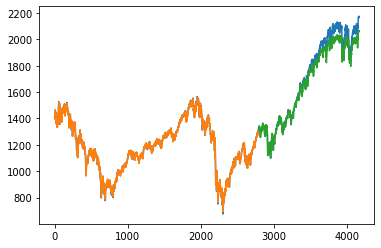

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict


testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()